In [1]:
from sec_api import ExecCompApi
import config

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
execCompApi = ExecCompApi(config.sec_api_key)

In [4]:
result_ticker = execCompApi.get_data('JNJ')

In [5]:
starter_df = pd.DataFrame(result_ticker)

In [6]:
ceo_title_list = ['CHIEF EXECUTIVE','CEO']
cfo_title_list = ['CHIEF FINANC','CFO']
interim_title_list = ['INTERIM','ACTING']

ceo_regstr = '|'.join(ceo_title_list)
cfo_regstr = '|'.join(cfo_title_list)
interim_regstr = '|'.join(interim_title_list)

# https://stackoverflow.com/questions/49508281/check-if-multiple-substrings-are-in-pandas-dataframe
starter_df['CEO'] = starter_df['position'].str.upper().str.contains(ceo_regstr)
starter_df['CFO'] = starter_df['position'].str.upper().str.contains(cfo_regstr)
starter_df['Interim'] = starter_df['position'].str.upper().str.contains(interim_regstr)

<AxesSubplot:xlabel='year', ylabel='salary'>

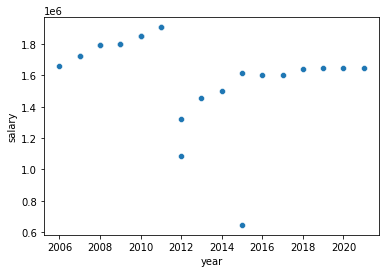

In [7]:
sns.scatterplot(data=starter_df[starter_df['CEO']==True],x='year',y='salary',)

In [8]:
#https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots
df = pd.melt(starter_df[starter_df['CEO']==True][['year','salary','nonEquityIncentiveCompensation','stockAwards','total']],
             id_vars='year', var_name='component', value_name="amount")

<AxesSubplot:xlabel='year', ylabel='amount'>

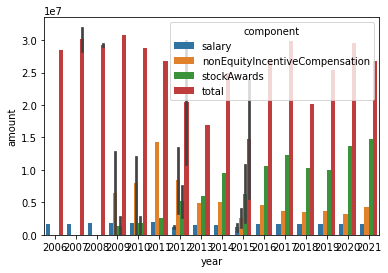

In [9]:
sns.barplot(data=df,x='year',y='amount',hue='component')

In [10]:
starter_df[(starter_df['CEO'] == True) & (starter_df['ticker'] == 'AAPL')]

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings,CEO,CFO,Interim


In [11]:
starter_df

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings,CEO,CFO,Interim
0,40f70160fdd0e54a9a3aaad7c272f9b0,200406,JNJ,Alex Gorsky,Chairman/CEO,2021,1650000,0,14789176,5069996,4252800,277071,26741959,NaN,True,False,False
1,6204f90eb44c7a5f4eb81e18b456b042,200406,JNJ,Joseph Wolk,"EVP, CFO",2021,938077,0,4877538,1688997,1560863,78243,10953615,NaN,False,True,False
2,f3ccae4bad9e6500e67f192325f67194,200406,JNJ,Joaquin Duato,Vice Chairman of the Executive Committee,2021,1030000,0,7001281,2393998,2319450,184796,13805292,NaN,False,False,False
3,6e2c8cac5389bfd9961c93a88f80c051,200406,JNJ,Jennifer Taubert,"EVP, Worldwide Chair Pharmaceuticals",2021,938077,0,4947245,1713005,1510314,49707,10225759,NaN,False,False,False
4,2806fc429510e3b585fb43ba9a9d1b46,200406,JNJ,Paulus Stoffels,"VC of the Executive Committee, CSO",2021,1222500,0,7487478,2567995,2660400,102189,15007450,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,4caf7a33d185243aab386551eb947124,200406,JNJ,Non Qualified,William C. Weldon Chairman/CEO,2007,1725000,0,0,2319368,0,0,28404762,NaN,True,False,False
85,76f0dc4ca394e0bc43594d892254af6b,200406,JNJ,Colleen A. Goggins,"WW Chairman, Consumer Group",2007,729923,0,0,0,0,0,8379759,NaN,False,False,False
86,b0c388852bfb253b7e3abb4af6eb372a,200406,JNJ,Russell C. Deyo,"VP, General Counsel",2006,735385,0,0,0,0,0,8387691,NaN,False,False,False
87,509134ca529069fa94797583e762906e,200406,JNJ,William C. Weldon,Chairman/CEO,2006,1659231,0,0,0,0,0,28557749,NaN,True,False,False
